<a href="https://colab.research.google.com/github/Yash-Yelave/Image_Processing_Computer_Vision/blob/main/pr9_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Original Image

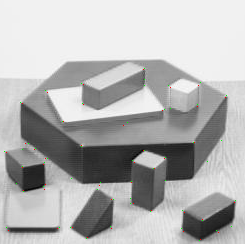

### Harris Corner Detection

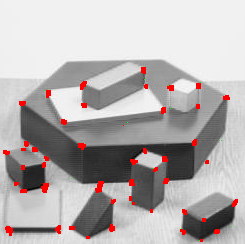

### Shi-Tomasi Corner Detection

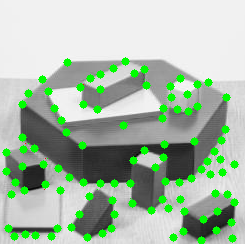

### Hessian-based Detection (using Laplacian of Gaussian approximation)

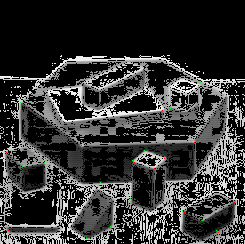

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Markdown
# ---------------------------
# Load and preprocess image
# ---------------------------
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/IPCV_PR/HarrisCornerDet2 (1).png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Harris Corner Detection
gray_float = np.float32(gray)
harris_corners = cv2.cornerHarris(src=gray_float, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)
img_harris = img.copy()
img_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]
# Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.intp(corners)
img_shi = img.copy()
for corner in corners:
 x, y = corner.ravel()
 cv2.circle(img_shi, (x, y), 4, (0, 255, 0),-1) # green circles
# Hessian-based Detection (using Laplacian of Gaussian approximation)
laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)
hessian = cv2.convertScaleAbs(laplacian)
_, thresh = cv2.threshold(hessian, 25, 255, cv2.THRESH_BINARY)
img_hessian = cv2.bitwise_and(img, img, mask=thresh)
display(Markdown('### Original Image'))
cv2_imshow(img)
display(Markdown('### Harris Corner Detection'))
cv2_imshow(img_harris)
display(Markdown('### Shi-Tomasi Corner Detection'))
cv2_imshow(img_shi)
display(Markdown('### Hessian-based Detection (using Laplacian of Gaussian approximation)'))
cv2_imshow(img_hessian)
cv2.waitKey(0)
cv2.destroyAllWindows()